## Sociodemographic

El dataset 'sociodemographic_df' contiene las siguientes variables:
- **pk_cid** (int64) 

Identificador de cliente
- **pk_partition** (object)

Fecha de ingesta de los datos
- **country_id** (object)

País de residencia del cliente
- **region_code** (float64)

Provincia de residencia del cliente (para ES)
- **gender** (object)

Sexo del cliente
- **age** (int64) 

Edad del cliente
- **deceased** (object)

Deceased index. N/S
- **salary** (float64)

Ingresos brutos de la unidad familiar

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
def df_description(df):
    """ df_description: returns a briefly description of the variables in a dataframe
        input: 
            - df : dataframe
        output:
            - None (prints information on the terminal)
    """
    display(df.head().T)

    print('\n\n Dataframe info: \n')
    display(df.info(verbose=True))

    print('\n\n Dataframe description: ')
    display(df.describe(include='all').T)  
    return None


def df_nulls(df):
    """ df_nulls: returns the columns with nulls, and the number of columns in each column
        input:
            - df : dataframe
        output:
            - None (prints information on the terminal)
    """
    print('Columns with nulls: \n')
    display(df.isnull().any())

    print('\n \n Number of nulls in each column:')
    display(df.isnull().sum())

    return None 

In [6]:
dir_path = '/content/drive/MyDrive/Nuclio Data Science - Proyecto Final/data/'
dir_path = '/Users/carlosperezricardo/Documents/data/'

sociodemographic = pd.read_csv(dir_path+'sociodemographic_df.csv', encoding='utf-8')
sociodemographic.drop(columns=['Unnamed: 0'], inplace=True)

df_description(sociodemographic)

,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
country_id,ES,ES,ES,ES,ES
region_code,29.00,13.00,13.00,50.00,50.00
gender,H,V,V,H,V
age,35,23,23,22,23
deceased,N,N,N,N,N
salary,"87,218.10","35,548.74","122,179.11","119,775.54",NaN




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


None



 Dataframe description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,"5,962,924.00",NaN,NaN,NaN,"1,234,929.80","162,302.04","15,891.00","1,112,532.00","1,231,097.00","1,352,339.00","1,553,689.00"
pk_partition,5962924,17,2019-05-28,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_id,5962924,41,ES,5960672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_code,"5,960,660.00",NaN,NaN,NaN,25.81,13.60,1.00,13.00,28.00,36.00,52.00
gender,5962899,2,H,3087502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,"5,962,924.00",NaN,NaN,NaN,29.76,11.98,2.00,22.00,25.00,34.00,105.00
deceased,5962924,2,N,5961849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,"4,450,821.00",NaN,NaN,NaN,"115,816.72","199,551.89","1,202.73","61,500.63","88,654.65","131,669.91","28,894,395.51"


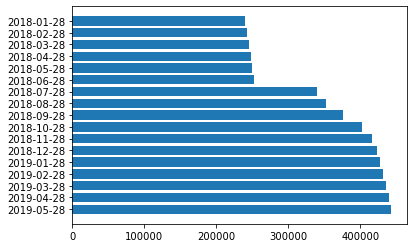

In [8]:
partitions = sociodemographic['pk_partition'].unique()
partitions = sorted(partitions)

partitions_valuecounts = sociodemographic['pk_partition'].value_counts()

fig, ax = plt.subplots()
ax.barh(partitions_valuecounts.index, partitions_valuecounts[:])
plt.show()

In [9]:
sociodemographic_df = sociodemographic[ sociodemographic['pk_partition'] == partitions[-1]]
df_description(sociodemographic_df)

,5519929,5519930,5519931,5519932,5519933
pk_cid,657826,657817,657986,657905,657336
pk_partition,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28
country_id,ES,ES,ES,ES,ES
region_code,25.00,8.00,41.00,28.00,28.00
gender,H,V,H,H,V
age,44,32,39,85,38
deceased,N,N,N,N,N
salary,"54,493.38",NaN,"100,993.17","154,059.09",NaN




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 5519929 to 5962923
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pk_cid        442995 non-null  int64  
 1   pk_partition  442995 non-null  object 
 2   country_id    442995 non-null  object 
 3   region_code   442833 non-null  float64
 4   gender        442993 non-null  object 
 5   age           442995 non-null  int64  
 6   deceased      442995 non-null  object 
 7   salary        295284 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 30.4+ MB


None



 Dataframe description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,"442,995.00",NaN,NaN,NaN,"1,271,884.97","177,957.39","16,063.00","1,141,604.50","1,280,164.00","1,419,055.50","1,553,689.00"
pk_partition,442995,1,2019-05-28,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_id,442995,41,ES,442833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_code,"442,833.00",NaN,NaN,NaN,25.88,13.54,1.00,13.00,28.00,36.00,52.00
gender,442993,2,H,227684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,"442,995.00",NaN,NaN,NaN,30.40,12.24,2.00,22.00,25.00,35.00,105.00
deceased,442995,2,N,442909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,"295,284.00",NaN,NaN,NaN,"116,674.77","206,836.38","1,202.73","61,627.71","88,979.34","132,485.89","28,894,395.51"


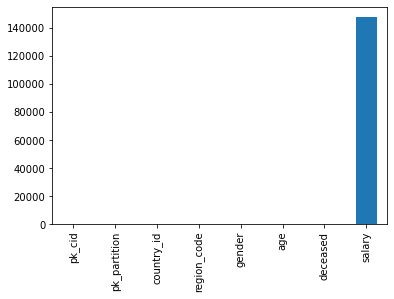

pk_cid               0
pk_partition         0
country_id           0
region_code        162
gender               2
age                  0
deceased             0
salary          147711
dtype: int64


In [10]:
sociodemographic_df.isna().sum().plot( kind="bar" )
plt.show()
print(sociodemographic_df.isna().sum())

In [11]:
import missingno as msno 
msno.matrix(sociodemographic_df) 
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [41]:
deceased = sociodemographic_df['deceased'].value_counts()

display(deceased)

N    442909
S        86
Name: deceased, dtype: int64

## Países

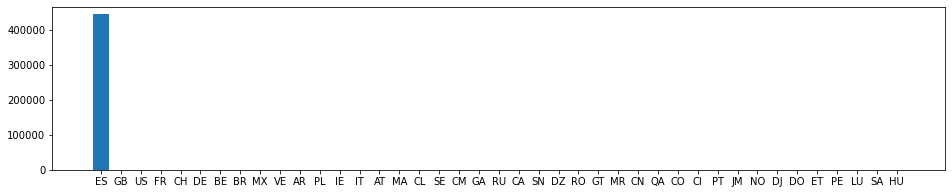

In [16]:
paises = sociodemographic_df['country_id'].value_counts()

fig, ax = plt.subplots(figsize=(16,3))
ax.bar(paises.index, paises)
plt.show()

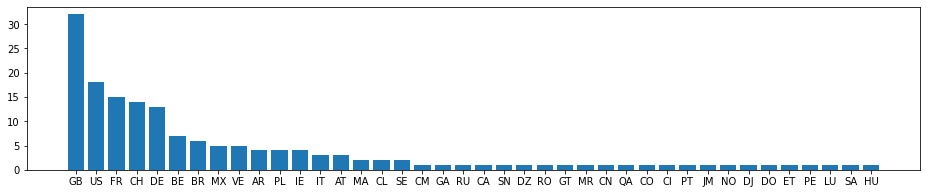

Existen 41 países en total


In [14]:
paises = sociodemographic_df['country_id'].value_counts()

fig, ax = plt.subplots(figsize=(16,3))

ax.bar(paises[1:].index, paises[1:])
plt.show()

print('Existen {} países en total'.format(len(paises.index)))

In [18]:
paises_code = {'ES': ['ES','España'], 'GB':['EU','Gran Bretaña'], 'US':['NA','Estados Unidos'], 
    'FR':['EU','Francia'], 'CH':['EU','Suiza'], 'DE':['EU','Alemania'], 'BE':['EU','Bélgica'], 
    'BR':['SA','Brasil'], 'VE':['SA','Venezuela'], 'MX':['SA','Mexico'], 'AR':['SA','Argentina'], 
    'IE':['EU','Irlanda'], 'PL':['EU','Polonia'], 'IT':['EU','Italia'], 'AT':['EU','Austria'], 
    'SE':['EU','Suecia'], 'CL':['SA','Chile'], 'MA':['AF','Marruecos'], 'CO':['SA','Colombia'], 
    'DZ':['AF','Argelia'], 'SN':['AF','Senegal'], 'ET':['AF','Etiopia'], 'RU':['EU','Rusia'], 
    'GA':['AF','Gambia'], 'SA':['AS','Arabia Saudita'], 'MR':['AF','Mautirania'], 'HU':['EU','Hungria'], 
    'JM':['SA','Jamaica'], 'CM':['AF','Camerun'], 'CI':['AF','Costa de Marfil'], 'RO':['EU','Rumania'], 
    'PE':['SA','Perú'], 'DO':['SA','República Dominacana'], 'QA':['AS','Qatar'], 'PT':['EU','Portugal'], 
    'LU':['EU','Luxembburgo'], 'DJ':['AF','Yibuti'], 'GT':['SA','Guatemala'], 'CN':['AS','China'], 
    'NO':['EU','Noruega'], 'CA':['NA','Canada']}

# https://laendercode.net/es/2-letter-code/br

continente = {'ES':'España', 'EU':'Europa', 'SA':'Sur América', 'NA':'Norte América', 'AS': 'Asia', 'AF':'África'}

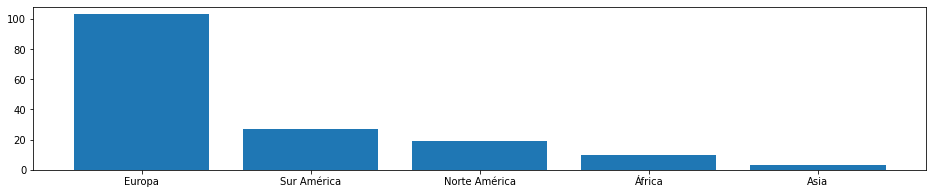

In [19]:
pais_continente = {}
for key, val in paises_code.items():
    pais_continente[key] = val[0]


paises = sociodemographic_df['country_id'].value_counts()
paises = paises.reset_index()
paises['continente'] = paises['index'].replace(pais_continente)

continentes = paises.groupby('continente').sum()
continentes = continentes.sort_values('country_id',ascending=False)

continentes = continentes.reset_index()

continentes_name = [ continente[continentes.iloc[i]['continente']] for i in range(len(continentes.index))]

fig, ax = plt.subplots(figsize=(16,3))
ax.bar( continentes_name[1:], continentes['country_id'][1:])
plt.show()

In [20]:
total = continentes['country_id'].sum()
for index, row in continentes.iterrows():
    percent = row['country_id']/total*100
    if percent > 1:
        print('El {:2f} % de los clientes son de {}.'.format( percent, continente[row['continente']] ))
    else:
        print('{} ({:2f} %) clientes son de {}.'.format( row['country_id'], percent, continente[row['continente']] ))

El 99.963431 % de los clientes son de España.
103 (0.023251 %) clientes son de Europa.
27 (0.006095 %) clientes son de Sur América.
19 (0.004289 %) clientes son de Norte América.
10 (0.002257 %) clientes son de África.
3 (0.000677 %) clientes son de Asia.


In [23]:
spanish_regions_code = {1:['Álava', 'País Vasco'], 2:['Albacete', 'Castilla-La Mancha'], 3:['Alicante', 'Com. Valenciana'],4:['Almería','Andalucía'],5:['Ávila','Castilla y León'], 6:['Badajoz','Extremadura'],	7:['Baleares','Islas Baleares'], 8:['Barcelona','Cataluña'],9:['Burgos','Castilla y León'], 10: ['Cáceres','Extremadura'], 11: ['Cádiz','Andalucía'], 12: ['Castellón','Com. Valenciana'], 13: ['Ciudad Real','Castilla-La Mancha'], 14: ['Córdoba','Andalucía'], 15: ['La Coruña','Galicia'], 16: ['Cuenca','Castilla-La Mancha'], 17: ['Gerona','Cataluña'], 18: ['Granada','Andalucía'], 19: ['Guadalajara','Castilla-La Mancha'], 20: ['Guipúzcoa','País Vasco'], 21: ['Huelva','Andalucía'], 22: ['Huesca','Aragón'], 23: ['Jaén','Andalucía'], 24: ['León','Castilla y León'], 25: ['Lérida','Cataluña'], 26: ['La Rioja','La Rioja'], 27: ['Lugo','Galicia'], 28: ['Madrid','Madrid'], 29: ['Málaga','Andalucía'], 30: ['Murcia','Murcia'], 31: ['Navarra','Com. de Navarra'], 32: ['Orense','Galicia'], 33: ['Asturias','Princ. de Asturias'], 34: ['Palencia','Castilla y León'], 35: ['Las Palmas','Islas Canarias'], 36: ['Pontevedra','Galicia'], 37: ['Salamanca','Castilla y León'], 38: ['Santa Cruz de Tenerife','Islas Canarias'], 39: ['Cantabria','Cantabria'], 40: ['Segovia','Castilla y León'], 41: ['Sevilla','Andalucía'], 42: ['Soria','Castilla y León'], 43: ['Tarragona','Cataluña'], 44: ['Teruel','Aragón'], 45: ['Toledo','Castilla-La Mancha'], 46: ['Valencia','Com. Valenciana'], 47: ['Valladolid','Castilla y León'], 48: ['Vizcaya','País Vasco'], 49: ['Zamora','Castilla y León'], 50: ['Zaragoza','Aragón'], 51: ['Ceuta','Ceuta y Melilla'], 52: ['Melilla','Ceuta y Melilla']}

# https://es.wikipedia.org/wiki/Anexo:Provincias_de_Espa%C3%B1a_por_c%C3%B3digo_postal

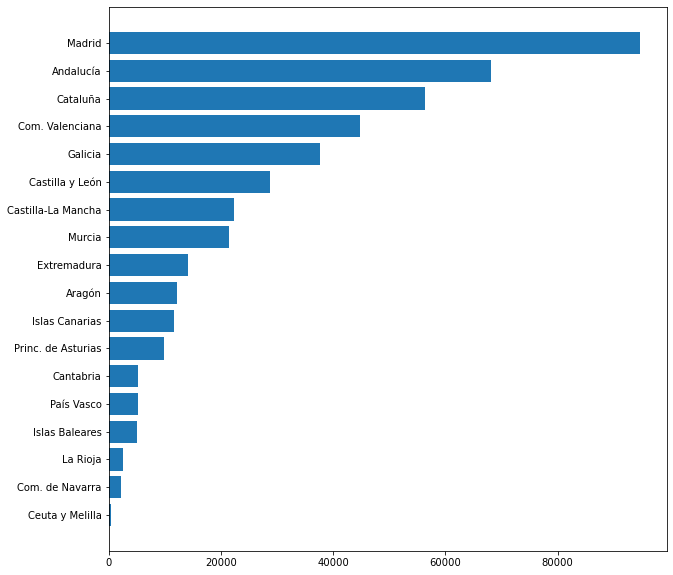

In [24]:
region_comunidad = {}
for key, val in spanish_regions_code.items():
    region_comunidad[key] = val[1]

spanish_regions = sociodemographic_df[ sociodemographic_df['country_id'] == 'ES']['region_code'].value_counts()
spanish_regions = spanish_regions.reset_index()
spanish_regions['comunidad'] = spanish_regions['index'].replace(region_comunidad)

comunidades = spanish_regions.groupby('comunidad').sum()
comunidades = comunidades.sort_values('region_code',ascending=True)
comunidades = comunidades.reset_index()

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(comunidades['comunidad'], comunidades['region_code'])
plt.show()

Como se puede observar hay muchos valores nulos en la columna *salary* (en total 147711, lo que corresponde al 33% de las filas) y también en region_code (en total 162) y gender (2 tan sólo).

Para el caso del *salary* se realizará un estudio exhaustivo y se intentará imponer un valor que concuerde con las características del cliente y el rango de datos existente. Se cree que la variable *salary* podrá tendrá un gran papel en la parte de customer segmentation o predicción.   

Diferentes plantamientos serán comprobados y finalmente se decidirá la mejor opción: si renunciar a las filas con los valores de *salary* nulos o introducir un valor estipulado.
- Algunos jóvenes pueden ser clientes pero no estar trabajando aún (en estos casos, el salario debería ser 0).
    - Si existen usuarios con menos de 16 años, su salario es 0 al no poder trabajar legalmente. 
- No se tiene información anterior del cliente o no han querido compartir esta información.

Finalmente, se han realizado las siguientes acciones:
- **Usuarios menores de 16 años.** Para los 6002 clientes con salario NaN siendo menores de 16 años, se ha impuesto como *salary* cero.

In [25]:
users_with_no_salary = sociodemographic_df[sociodemographic_df['salary'].isna()]

df_description(users_with_no_salary)

,5519930,5519933,5519937,5519943,5519944
pk_cid,657817,657336,655774,656215,656613
pk_partition,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28
country_id,ES,ES,ES,ES,ES
region_code,8.00,28.00,15.00,28.00,8.00
gender,V,V,H,V,H
age,32,38,37,38,45
deceased,N,N,N,N,N
salary,NaN,NaN,NaN,NaN,NaN




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147711 entries, 5519930 to 5962923
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pk_cid        147711 non-null  int64  
 1   pk_partition  147711 non-null  object 
 2   country_id    147711 non-null  object 
 3   region_code   147557 non-null  float64
 4   gender        147711 non-null  object 
 5   age           147711 non-null  int64  
 6   deceased      147711 non-null  object 
 7   salary        0 non-null       float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.1+ MB


None



 Dataframe description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,"147,711.00",NaN,NaN,NaN,"1,374,174.82","181,433.04","16,063.00","1,253,362.00","1,463,322.00","1,504,929.50","1,553,689.00"
pk_partition,147711,1,2019-05-28,147711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_id,147711,37,ES,147557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_code,"147,557.00",NaN,NaN,NaN,26.27,13.38,1.00,15.00,28.00,36.00,52.00
gender,147711,2,H,75470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,"147,711.00",NaN,NaN,NaN,30.46,12.60,2.00,22.00,25.00,36.00,102.00
deceased,147711,2,N,147697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este caso, mostraremos en una gráfica para verificar que el planteamiento sea cierto.

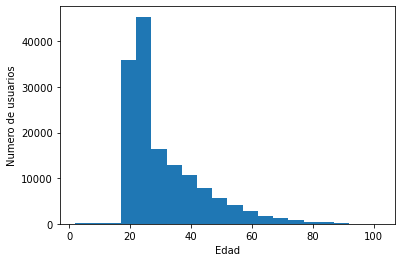

Usuarios menores de 16 años:
(749, 8)


In [30]:
fig, ax = plt.subplots()

ax.hist(users_with_no_salary['age'], bins=20)
ax.set_xlabel('Edad')
ax.set_ylabel('Numero de usuarios')
plt.show()

print('Usuarios menores de 16 años:')
print(users_with_no_salary[ users_with_no_salary['age'] < 16].shape)

In [38]:
paises = users_with_no_salary['country_id'].value_counts()

display(paises)

ES    147557
GB        31
US        18
FR        15
DE        13
CH        12
BE         7
BR         6
VE         5
MX         5
PL         4
AR         4
IE         4
IT         3
AT         3
SE         2
MA         2
CI         1
DJ         1
JM         1
SA         1
NO         1
CL         1
LU         1
GT         1
MR         1
DO         1
PT         1
RU         1
SN         1
ET         1
GA         1
CM         1
CN         1
QA         1
CO         1
HU         1
Name: country_id, dtype: int64

In [40]:
deceased = users_with_no_salary['deceased'].value_counts()

display(deceased)

N    147697
S        14
Name: deceased, dtype: int64

In [ ]:
# Usuarios menores de 16 años
#users_with_no_salary[ users_with_no_salary['age'] < 16] ['salary'] = 0

Mirar qué tipo de cuenta tienen los clientes: '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'.

- Si el cliente tiene una cuenta TOP, se escogerá la mediana de los salarios de clientes con cuenta TOP.
- Igual para los casos de clientes con cuentas: PARTICULARES y UNIVERSITARIO.and

¿Por qué se escoge la mediana y no el valor medio?

Si bien para el caso de Particulares o Universitarios, la media y la mediana podrían estar cerca, para el caso TOP, los salarios probablemente sean muy dispares y haya máximos que afecten sustancialmente al valor medio. 

Como se ilustra en [[1]], en Medina, Washington (ciudad donde viven Bill Gates y Jeff Bezos) la media de salario en esa ciudad estará muy influenciada por el salario/patrimonio de estos dos billonarios, sin embargo si tomamos la mediana no importará cuan rico Bill Gates o Jeff Bezos sean. 

In [45]:
# Volvemos a cargar commercial_activity_df 
commercial_activity = pd.read_csv(dir_path+'commercial_activity_df.csv', encoding='utf-8')
commercial_activity.drop(columns=['Unnamed: 0'], inplace=True)

commercial_activity_df = commercial_activity[  commercial_activity['pk_partition'] == partitions[-1]]
df_description(commercial_activity_df)

del commercial_activity

print(commercial_activity_df.shape)
commercial_activity_df['segment'].fillna('Sin Asignar', inplace=True)

commercial_activity_df = commercial_activity_df[(commercial_activity_df['segment'] != 'Sin Asignar')]
print(commercial_activity_df.shape)

,5519929,5519930,5519931,5519932,5519933
pk_cid,657826,657817,657986,657905,657336
pk_partition,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28
entry_date,2015-05-24,2019-05-12,2016-02-18,2017-02-07,2019-03-28
entry_channel,013,NaN,KAF,KAT,KAT
active_customer,1.00,0.00,1.00,1.00,1.00
segment,02 - PARTICULARES,NaN,02 - PARTICULARES,01 - TOP,02 - PARTICULARES




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 5519929 to 5962923
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   pk_cid           442995 non-null  int64  
 1   pk_partition     442995 non-null  object 
 2   entry_date       442995 non-null  object 
 3   entry_channel    438486 non-null  object 
 4   active_customer  442995 non-null  float64
 5   segment          438379 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.7+ MB


None



 Dataframe description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,"442,995.00",NaN,NaN,NaN,"1,271,884.97","177,957.39","16,063.00","1,141,604.50","1,280,164.00","1,419,055.50","1,553,689.00"
pk_partition,442995,1,2019-05-28,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_date,442995,1495,2017-07-28,3422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_channel,438486,65,KHE,194727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_customer,"442,995.00",NaN,NaN,NaN,0.39,0.49,0.00,0.00,0.00,1.00,1.00
segment,438379,3,03 - UNIVERSITARIO,284236,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(442995, 6)
(438379, 6)


In [46]:
sociodemo_segment = pd.merge( sociodemographic_df, commercial_activity_df[['pk_cid','pk_partition','segment']], on=['pk_cid','pk_partition'], how='left')

sociodemo_segment.head(5)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,segment
0,657826,2019-05-28,ES,25.00,H,44,N,"54,493.38",02 - PARTICULARES
1,657817,2019-05-28,ES,8.00,V,32,N,nan,NaN
2,657986,2019-05-28,ES,41.00,H,39,N,"100,993.17",02 - PARTICULARES
3,657905,2019-05-28,ES,28.00,H,85,N,"154,059.09",01 - TOP
4,657336,2019-05-28,ES,28.00,V,38,N,nan,02 - PARTICULARES


In [47]:
segment_salaries = sociodemo_segment.groupby('segment')[['age','salary']].agg(['min','max','median','mean','std','count'])

display(segment_salaries)

age                                    salary  \
                   min  max median  mean   std   count       min   
segment                                                            
01 - TOP            16  102     52 53.97 14.61    7179 14,293.56   
02 - PARTICULARES    2  105     40 41.73 13.22  146964  3,796.86   
03 - UNIVERSITARIO  20   77     23 23.79  3.03  284236  1,202.73   

                                                                           
                             max     median       mean        std   count  
segment                                                                    
01 - TOP           10,270,345.11 121,280.34 147,810.93 182,630.94    4431  
02 - PARTICULARES  28,894,395.51  88,585.50 115,920.16 235,632.70   95145  
03 - UNIVERSITARIO 28,894,395.51  88,593.42 116,326.57 191,766.54  195659

Para el caso del segment TOP, la mediana es 121.280 euros mientras que la media es de 147.810 euros. Por lo que se puede afirmar que existen 'outliers' que distorsionan la realidad (como es el salario de 10.270.345 euros).

En la siguiente figura se puede ver la distribución de edades para cada uno de los segmentos:

In [48]:
def segment_plot(df, color, ax, limit):

    ax[0].hist( df['age'], color=color, bins=20)
    ax[1].plot( df['age'], df['salary'], color=color, marker = '.', linestyle = 'none', alpha=0.4)

    df_ = df.sort_values('salary',ascending=False)
    df_ = df_[limit:] #quitamos los 'limit' salarios más altos en ese grupo.
    ax[2].plot( df_['age'], df_['salary'], color=color, marker = '.', linestyle = 'none', alpha=0.4)

    ax[2].set_xlabel('Edad')
    ax[0].set_ylabel('Numero de clientes'); ax[0].set_title('Distribución de edades') 
    ax[1].set_ylabel('Numero de clientes'); ax[1].set_title('Edad y salario') 
    ax[2].set_ylabel('Numero de clientes'); ax[2].set_title('Edad y salario - sin outliers') 
    
    return ax

Con las sigueintes gráficas y tablas anteriores se determina que para los casos en los que el valor de *salary* sea nulo, para el caso de los clientes en el **segment TOP**:

- En la primera figura se puede observar como la distribución podría ser considerada como normal con un *skewness* hacia la derecha considerable, con una desviación estándar elevada. 

- Se aprecia en la última figura, la distribución de edad y salarios, no existe una relación lineal (o parabólica) entre ambas variables. 

Por lo que, tras estas observaciones se opta por imponer como valor en los salarios nulos la mediana de 121.280 euros para todo el rango de edades.


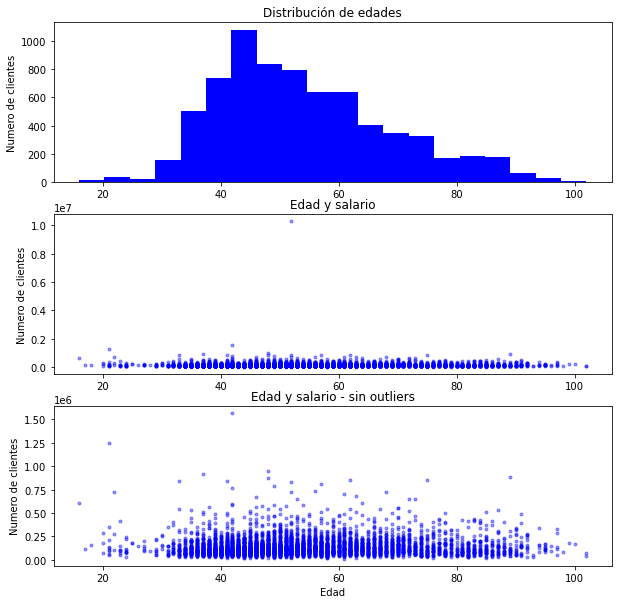

In [49]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax = segment_plot(sociodemo_segment[sociodemo_segment['segment'] == '01 - TOP'], 'blue', ax, 1)
plt.show()

Para el **segment PARTICULARES**:

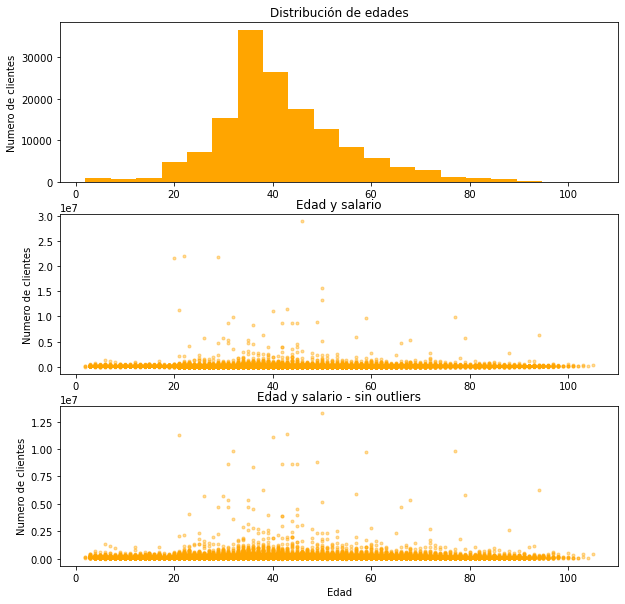

In [50]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax = segment_plot(sociodemo_segment[sociodemo_segment['segment'] == '02 - PARTICULARES'], 'orange', ax, 5)
plt.show()

Para el **segment UNIVERSITARIO**:

Se puede observar como las cuentas segment UNIVERSITARIO están en un rango de edades de entre 18 y 33 años, y la distribución de edades (a simple vista puede ser considerada normal (aunque algo *skewness* hacia la derecha) con una desviación estándar poco elevada). 

Por lo que respecta a la relación de salarios con la edad, la mayoría de salarios se encuentran 

se escoge la mediana de 87.855 euros, en frente de la media de 114.978 euros. 

Se decide que: 
- los menores de 18 años, su salario es 0. Probablemente el salario que aparece en los clientes menores de edad, corresponda al salario de sus padres (y de todas maneras no será un customer a perseguir).

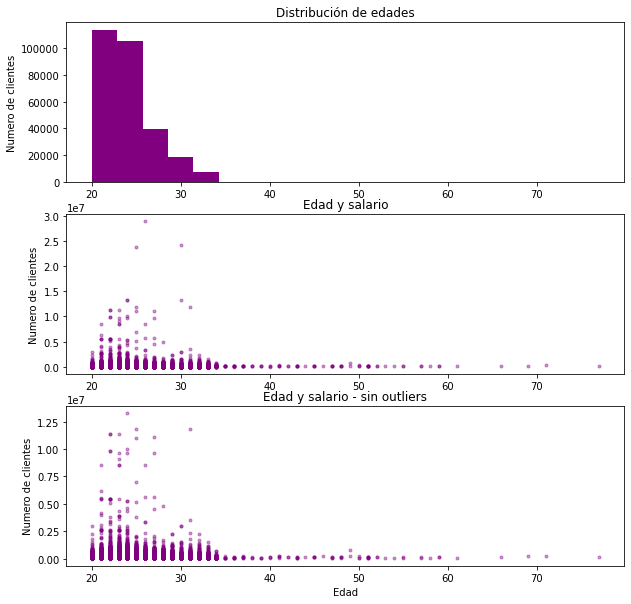

In [51]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax = segment_plot(sociodemo_segment[sociodemo_segment['segment'] == '03 - UNIVERSITARIO'], 'purple', ax, 5)
plt.show()

Finalmente, se sustituyen los valores nulos para cada unos de los casos:


In [18]:
sociodemo_segment[(sociodemo_segment['segment'] == '02 - PARTICULARES') & (sociodemo_segment['salary'].isna())]['salary']

4        NaN
8        NaN
14       NaN
15       NaN
20       NaN
          ..
442752   NaN
442753   NaN
442770   NaN
442962   NaN
442992   NaN
Name: salary, Length: 51819, dtype: float64

In [58]:
print(sociodemo_segment.isna().sum())

pk_cid               0
pk_partition         0
country_id           0
region_code        162
gender               2
age                  0
deceased             0
salary          147711
segment           4616
dtype: int64


In [73]:
sociodemo_segment = sociodemo_segment.fillna(x)

In [113]:
# null values para segment TOP
x = segment_salaries.loc['01 - TOP',('salary','median')]

indexes = sociodemo_segment[(sociodemo_segment['segment'] == '01 - TOP') & (sociodemo_segment['salary'].isna())].index

sociodemo_segment.iloc[indexes] = sociodemo_segment.iloc[indexes].fillna(x)

# null values para segment PARTICULARES
y = segment_salaries.loc['02 - PARTICULARES',('salary','median')]

indexes = sociodemo_segment[(sociodemo_segment['segment'] == '02 - PARTICULARES') & (sociodemo_segment['salary'].isna())].index

sociodemo_segment.iloc[indexes] = sociodemo_segment.iloc[indexes].fillna(y)

# null values para segment UNIVERSITARIOS
z = segment_salaries.loc['03 - UNIVERSITARIO',('salary','median')]

indexes = sociodemo_segment[(sociodemo_segment['segment'] == '03 - UNIVERSITARIO') & (sociodemo_segment['salary'].isna())].index

sociodemo_segment.iloc[indexes] = sociodemo_segment.iloc[indexes].fillna(z)

In [111]:
x = segment_salaries.loc['01 - TOP',('salary','median')]

sociodemo_segment[(sociodemo_segment['segment'] == '01 - TOP') & (sociodemo_segment['salary'].isna())]['salary'].fillna(0, inplace=True)

#sociodemo_segment[(sociodemo_segment['segment'] == '01 - TOP') & (sociodemo_segment['salary'].isna())][['salary']]

In [114]:
print(sociodemo_segment.isna().sum())

pk_cid             0
pk_partition       0
country_id         0
region_code        8
gender             2
age                0
deceased           0
salary          4567
segment         4616
dtype: int64


Finalmente, para los clientes con salario nulo y sin un segmento predefinido.

In [118]:
indexes = sociodemo_segment[(sociodemo_segment['salary'].isna())].index

sociodemo_segment.iloc[indexes] = sociodemo_segment.iloc[indexes].fillna(20000)

In [119]:
print(sociodemo_segment.isna().sum())

pk_cid           0
pk_partition     0
country_id       0
region_code      8
gender           2
age              0
deceased         0
salary           0
segment         49
dtype: int64


In [ ]:
indexes = sociodemo_segment[(sociodemo_segment['gender'].isna())].index
sociodemo_segment.iloc[indexes] = sociodemo_segment.iloc[indexes].fillna('H')

In [120]:
print(sociodemo_segment['gender'].unique() )

['H' 'V' nan]


In [ ]:
clean_sociodemo = sociodemo_segment[['pk_cid','pk_partition','country_id','region_code','gender','age','deceased','salary']].to_csv('./data/sociodemographic_clean.csv')

sociodemo_segment[['pk_cid','pk_partition','country_id','region_code','gender','age','deceased','salary']].head(5)